In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fear_path = "/content/drive/MyDrive/ds_harshada/csv_files/fear_greed_index.csv"
hist_path = "/content/drive/MyDrive/ds_harshada/csv_files/historical_data.csv"

In [ ]:
fear = pd.read_csv(fear_path)
hist = pd.read_csv(hist_path)

In [ ]:
fear.head()



,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
fear.shape
fear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
hist.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
hist.shape
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
# Clean Fear-Greed dataset
fear.columns = fear.columns.str.strip().str.lower()


In [ ]:
# Convert date to datetime
fear['date'] = pd.to_datetime(fear['date'], errors='coerce')

In [ ]:
# Convert sentiment text to numbers
sent_map = {
    "Extreme Fear": 1,
    "Fear": 2,
    "Neutral": 3,
    "Greed": 4,
    "Extreme Greed": 5
}

fear["sentiment_score"] = fear["classification"].map(sent_map)

fear.head()

,timestamp,value,classification,date,sentiment_score
0,1517463000,30,Fear,2018-02-01,2
1,1517549400,15,Extreme Fear,2018-02-02,1
2,1517635800,40,Fear,2018-02-03,2
3,1517722200,24,Extreme Fear,2018-02-04,1
4,1517808600,11,Extreme Fear,2018-02-05,1


In [ ]:
#Clean and prepare Trader dataset

hist.columns = hist.columns.str.lower().str.replace(" ", "_")

# Convert timestamp to date
hist["timestamp_ist"] = pd.to_datetime(hist["timestamp_ist"], errors="coerce")
hist["date"] = hist["timestamp_ist"].dt.date
hist["date"] = pd.to_datetime(hist["date"])

In [ ]:
#Feature Engineering
# Trade value = size_tokens × execution_price
hist["trade_value"] = hist["size_tokens"] * hist["execution_price"]

# Long = Buy
hist["is_long"] = (hist["side"].str.lower() == "buy").astype(int)

In [ ]:
#Aggregating
daily = hist.groupby("date").agg(
    total_trades=("trade_id", "count"),
    total_volume=("trade_value", "sum"),
    avg_price=("execution_price", "mean"),
    total_pnl=("closed_pnl", "sum"),
    long_ratio=("is_long", "mean")
).reset_index()

daily.head()

,date,total_trades,total_volume,avg_price,total_pnl,long_ratio
0,2023-01-05,3,476.992810,1898.133333,0.000000,1.000000
1,2023-05-12,9,50005.829170,11038.300000,0.000000,0.777778
2,2024-01-01,18,264239.512610,10373.330667,-129.531460,0.555556
3,2024-01-02,6,2008.184771,0.076126,0.000000,1.000000
4,2024-01-03,137,472974.663145,2.725657,8244.241409,0.270073


In [ ]:
final = pd.merge(daily, fear, on="date", how="left")

final["sentiment_score"] = final["sentiment_score"].fillna(0)
final["classification"] = final["classification"].fillna("Unknown")

final.head()

,date,total_trades,total_volume,avg_price,total_pnl,long_ratio,timestamp,value,classification,sentiment_score
0,2023-01-05,3,476.992810,1898.133333,0.000000,1.000000,1.672897e+09,29.0,Fear,2.0
1,2023-05-12,9,50005.829170,11038.300000,0.000000,0.777778,1.683869e+09,49.0,Neutral,3.0
2,2024-01-01,18,264239.512610,10373.330667,-129.531460,0.555556,1.704087e+09,65.0,Greed,4.0
3,2024-01-02,6,2008.184771,0.076126,0.000000,1.000000,1.704173e+09,71.0,Greed,4.0
4,2024-01-03,137,472974.663145,2.725657,8244.241409,0.270073,1.704260e+09,70.0,Greed,4.0


In [ ]:
save_path = "/content/drive/MyDrive/ds_harshada/csv_files/final_dataset.csv"
final.to_csv(save_path, index=False)

print("CSV saved at:", save_path)


CSV saved at: /content/drive/MyDrive/ds_harshada/csv_files/final_dataset.csv


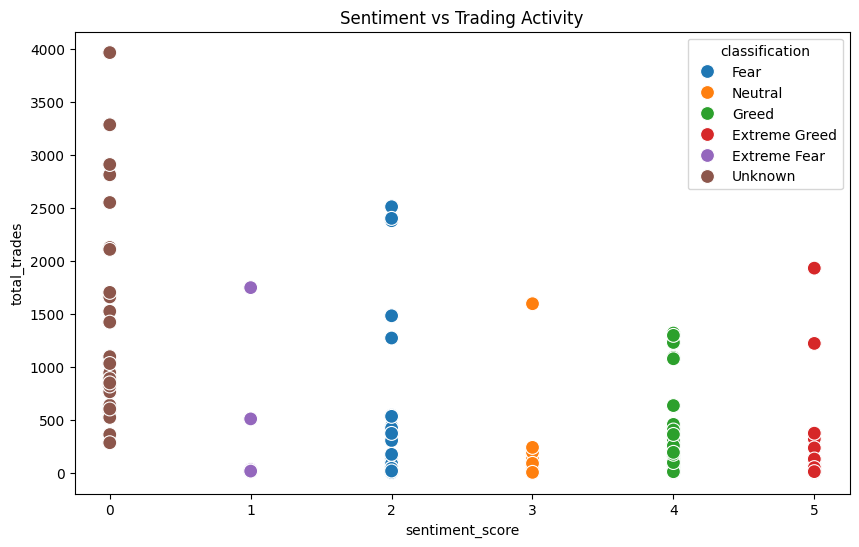

In [ ]:
#Sentiment vs Trading Activity
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=final,
    x="sentiment_score",
    y="total_trades",
    hue="classification",
    s=100
)
plt.title("Sentiment vs Trading Activity")
plt.show()

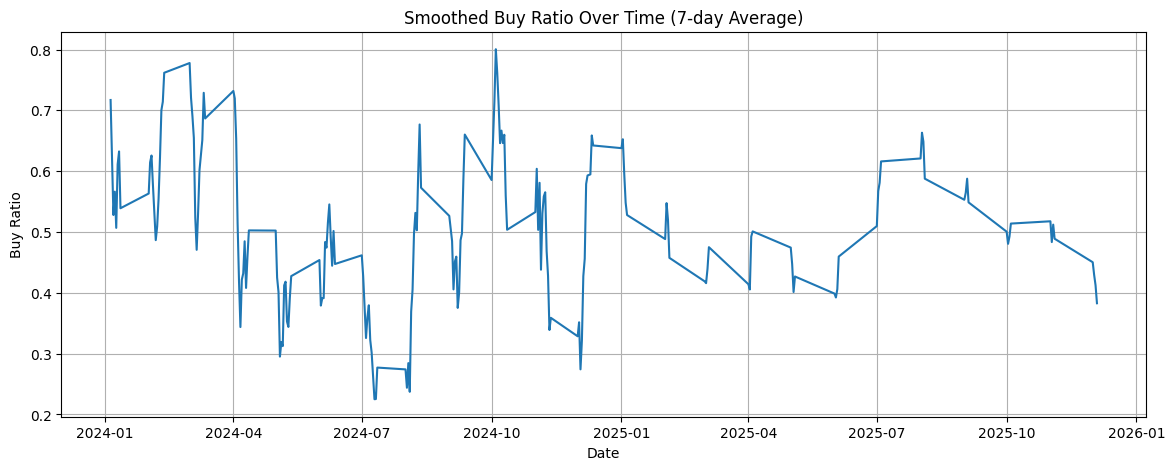

In [ ]:
final_sorted = final.sort_values("date")
final_sorted["long_ratio_ma7"] = final_sorted["long_ratio"].rolling(7).mean()

plt.figure(figsize=(14,5))
sns.lineplot(data=final_sorted, x="date", y="long_ratio_ma7")
plt.title("Smoothed Buy Ratio Over Time (7-day Average)")
plt.ylabel("Buy Ratio")
plt.xlabel("Date")
plt.grid(True)
plt.show()

